## Observations and Insights 

In [127]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
combined_data_df = pd.merge(study_results, mouse_metadata, on='Mouse ID')
# Display the data table for preview
combined_data_df

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,b128,5,45.651331,0,Capomulin,Female,9,22
2,b128,10,43.270852,0,Capomulin,Female,9,22
3,b128,15,43.784893,0,Capomulin,Female,9,22
4,b128,20,42.731552,0,Capomulin,Female,9,22
...,...,...,...,...,...,...,...,...
1888,m601,25,33.118756,1,Capomulin,Male,22,17
1889,m601,30,31.758275,1,Capomulin,Male,22,17
1890,m601,35,30.834357,1,Capomulin,Male,22,17
1891,m601,40,31.378045,1,Capomulin,Male,22,17


In [128]:
# Checking the number of mice.
total_mice = len(combined_data_df["Mouse ID"].unique())
print("Total number of mice: " + str(total_mice))

Total number of mice: 249


In [129]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicate = combined_data_df[combined_data_df.duplicated()]
dup_mouse = duplicate['Mouse ID']
dupmouse = dup_mouse.iloc[0]
dupmouse

'g989'

In [130]:
# Optional: Get all the data for the duplicate mouse ID. 
dup = combined_data_df.loc[combined_data_df['Mouse ID'] == dupmouse]
dup

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
860,g989,0,45.000000,0,Propriva,Female,21,26
861,g989,0,45.000000,0,Propriva,Female,21,26
862,g989,5,48.786801,0,Propriva,Female,21,26
863,g989,5,47.570392,0,Propriva,Female,21,26
864,g989,10,51.745156,0,Propriva,Female,21,26
865,g989,10,49.880528,0,Propriva,Female,21,26
866,g989,15,51.325852,1,Propriva,Female,21,26
867,g989,15,53.442020,0,Propriva,Female,21,26
868,g989,20,55.326122,1,Propriva,Female,21,26
869,g989,20,54.657650,1,Propriva,Female,21,26


In [131]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_data_df = combined_data_df[combined_data_df["Mouse ID"].str.contains(dupmouse)==False]
clean_data_df

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,b128,5,45.651331,0,Capomulin,Female,9,22
2,b128,10,43.270852,0,Capomulin,Female,9,22
3,b128,15,43.784893,0,Capomulin,Female,9,22
4,b128,20,42.731552,0,Capomulin,Female,9,22
...,...,...,...,...,...,...,...,...
1888,m601,25,33.118756,1,Capomulin,Male,22,17
1889,m601,30,31.758275,1,Capomulin,Male,22,17
1890,m601,35,30.834357,1,Capomulin,Male,22,17
1891,m601,40,31.378045,1,Capomulin,Male,22,17


In [132]:
# Checking the number of mice in the clean DataFrame.
new_mice_total = len(clean_data_df['Mouse ID'].unique())
new_mice_total

248

## Summary Statistics

In [133]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
regi_mean = clean_data_df.groupby('Drug Regimen').mean()
regimean = regi_mean['Tumor Volume (mm3)']
regimean

Drug Regimen
Capomulin    40.675741
Ceftamin     52.591172
Infubinol    52.884795
Ketapril     55.235638
Naftisol     54.331565
Placebo      54.033581
Propriva     52.320930
Ramicane     40.216745
Stelasyn     54.233149
Zoniferol    53.236507
Name: Tumor Volume (mm3), dtype: float64

In [134]:
regi_median = clean_data_df.groupby('Drug Regimen').median()
regimedian = regi_median['Tumor Volume (mm3)']
regimedian

Drug Regimen
Capomulin    41.557809
Ceftamin     51.776157
Infubinol    51.820584
Ketapril     53.698743
Naftisol     52.509285
Placebo      52.288934
Propriva     50.446266
Ramicane     40.673236
Stelasyn     52.431737
Zoniferol    51.818479
Name: Tumor Volume (mm3), dtype: float64

In [135]:
regi_var = clean_data_df.groupby('Drug Regimen').var()
regivar = regi_var['Tumor Volume (mm3)']
regivar

Drug Regimen
Capomulin    24.947764
Ceftamin     39.290177
Infubinol    43.128684
Ketapril     68.553577
Naftisol     66.173479
Placebo      61.168083
Propriva     43.852013
Ramicane     23.486704
Stelasyn     59.450562
Zoniferol    48.533355
Name: Tumor Volume (mm3), dtype: float64

In [136]:
regi_sd = clean_data_df.groupby('Drug Regimen').std()
regisd = regi_sd['Tumor Volume (mm3)']
regisd

Drug Regimen
Capomulin    4.994774
Ceftamin     6.268188
Infubinol    6.567243
Ketapril     8.279709
Naftisol     8.134708
Placebo      7.821003
Propriva     6.622085
Ramicane     4.846308
Stelasyn     7.710419
Zoniferol    6.966589
Name: Tumor Volume (mm3), dtype: float64

In [137]:
regi_sem = clean_data_df.groupby('Drug Regimen').sem()
regisem = regi_sem['Tumor Volume (mm3)']
regisem

Drug Regimen
Capomulin    0.329346
Ceftamin     0.469821
Infubinol    0.492236
Ketapril     0.603860
Naftisol     0.596466
Placebo      0.581331
Propriva     0.544332
Ramicane     0.320955
Stelasyn     0.573111
Zoniferol    0.516398
Name: Tumor Volume (mm3), dtype: float64

In [138]:
# Assemble the resulting series into a single summary dataframe.
describe_summary_df = pd.DataFrame({
    'Tumor Volume Mean': regimean,
    'Tumor Volume Median': regimedian,
    'Tumor Volume Variance': regivar,
    'Tumor Volume Standard Deviation': regisd,
    'Tumor Volume SEM': regisem
})
describe_summary_df

,Tumor Volume Mean,Tumor Volume Median,Tumor Volume Variance,Tumor Volume Standard Deviation,Tumor Volume SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [139]:
# Using the aggregation method, produce the same summary statistics in a single line
agg_df = clean_data_df.groupby('Drug Regimen').agg(["mean","median","var","std","sem"])
agg_df['Tumor Volume (mm3)']

,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

In [140]:
# Generate a bar plot showing the total number of unique mice tested on each drug regimen using pandas.
mice_per_regi = clean_data_df.groupby('Drug Regimen').count().reset_index()
mice_perdrug = mice_per_regi[['Drug Regimen', 'Mouse ID']]
mice_perdrug = mice_perdrug.set_index('Drug Regimen')
mice_perdrug

,Mouse ID
Drug Regimen,
Capomulin,230
Ceftamin,178
Infubinol,178
Ketapril,188
Naftisol,186
Placebo,181
Propriva,148
Ramicane,228
Stelasyn,181


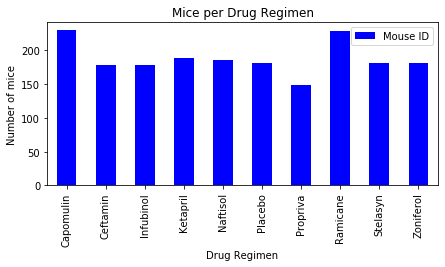

<Figure size 432x288 with 0 Axes>

In [141]:
# Use DataFrame.plot() in order to create a bar chart of the data
mice_perdrug.plot(kind="bar", color='b', figsize=(7,3))

# Set a title for the chart
plt.title("Mice per Drug Regimen")
plt.ylabel("Number of mice")

plt.show()
plt.tight_layout()

In [142]:
mice_per_regi2 = clean_data_df.groupby('Drug Regimen').count().reset_index()
mice_perdrug2 = mice_per_regi[['Drug Regimen', 'Mouse ID']]
mice_perdrug2

,Drug Regimen,Mouse ID
0,Capomulin,230
1,Ceftamin,178
2,Infubinol,178
3,Ketapril,188
4,Naftisol,186
5,Placebo,181
6,Propriva,148
7,Ramicane,228
8,Stelasyn,181
9,Zoniferol,182


In [143]:
# Generate a bar plot showing the total number of unique mice tested on each drug regimen using pyplot.
# Set x axis and tick locations
x_axis = np.arange(len(mice_perdrug))
tick_locations = [value for value in x_axis]
x_axis

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

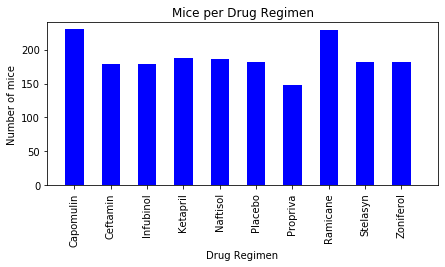

<Figure size 432x288 with 0 Axes>

In [144]:
# Create a list indicating where to write x labels
plt.figure(figsize=(7,3))
plt.bar(x_axis, mice_perdrug2["Mouse ID"], color='b', alpha=1, width=.5, align="center")
plt.xticks(tick_locations, mice_perdrug2["Drug Regimen"], rotation="vertical")

# Set a title for the chart
plt.title("Mice per Drug Regimen")
plt.xlabel("Drug Regimen")
plt.ylabel("Number of mice")

# Set x and y limits
plt.xlim(-0.75, len(x_axis))
plt.ylim(0, max(mice_perdrug["Mouse ID"])+10)

plt.show()
plt.tight_layout()

In [145]:
#Modify data to only list one entry per mouse
all_mice = combined_data_df.drop_duplicates(subset='Mouse ID', keep='first')
male_female = all_mice['Sex'].value_counts()
male_female

Male      125
Female    124
Name: Sex, dtype: int64

In [146]:
male_female_df = pd.DataFrame({
    "Number of mice per Gender": male_female
})
male_female_df

,Number of mice per Gender
Male,125
Female,124


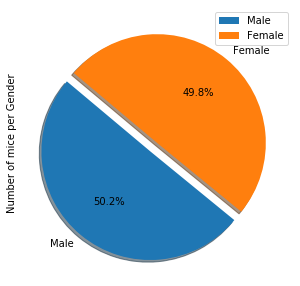

In [147]:
explode = (0.1, 0)
# Generate a pie plot showing the distribution of female versus male mice using pandas
#Modify data to only list one entry per mouse
male_female_df.plot.pie(y='Number of mice per Gender', startangle=140, figsize=(5, 5), shadow=True, explode=explode, autopct="%1.1f%%", )

In [148]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
# Labels for the sections of our pie chart
labels = ["Male", "Female"]

# The values of each section of the pie chart
sizes = [125, 124]

# The colors of each section of the pie chart
colors = ["blue", "pink"]

# Tells matplotlib to seperate the "Male mice" from "Female mice" section from the others
explode = (0.1, 0)

(-1.1762367126898932,
 1.1254463310846248,
 -1.190308764526366,
 1.124996700756096)

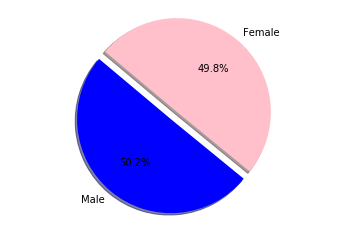

In [149]:
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=140)

# Tells matplotlib that we want a pie chart with equal axes
plt.axis("equal")

## Quartiles, Outliers and Boxplots

In [150]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
tum_siz = clean_data_df.groupby('Mouse ID').max()
four_regi = tum_siz.loc[(tum_siz["Drug Regimen"] == "Capomulin") | (
    tum_siz["Drug Regimen"] == "Ramicane") | (tum_siz["Drug Regimen"] == "Infubinol") | (tum_siz["Drug Regimen"] == "Ceftamin"), :]
four_regi

,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
Mouse ID,,,,,,,
a203,45,67.973419,2,Infubinol,Female,20,23
a251,45,65.525743,1,Infubinol,Female,21,25
a275,45,62.999356,3,Ceftamin,Female,20,28
a411,45,45.466677,1,Ramicane,Male,3,22
a444,45,45.000000,0,Ramicane,Female,10,25
...,...,...,...,...,...,...,...
y769,45,68.594745,4,Ceftamin,Female,6,27
y793,45,45.000000,2,Capomulin,Male,17,17
y865,45,64.729837,3,Ceftamin,Male,23,26


In [151]:
#Extract Drug Regimen, Timepoint, and Tumor Volume (mm3) columns
last_size = four_regi[['Drug Regimen', 'Timepoint', 'Tumor Volume (mm3)']]

#Sort Columns to match Drug Regimens in the order they were given
last_size['Drug Regimen'] = pd.Categorical(last_size['Drug Regimen'], ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"])
sorted_last_size = last_size.sort_values("Drug Regimen")
sorted_last_size

/Users/alfonsocamero/opt/anaconda3/envs/PythonData/lib/python3.6/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


,Drug Regimen,Timepoint,Tumor Volume (mm3)
Mouse ID,,,
l897,Capomulin,45,46.154737
g288,Capomulin,45,46.304003
g316,Capomulin,45,46.809225
i557,Capomulin,45,47.685963
i738,Capomulin,45,45.595685
...,...,...,...
l733,Ceftamin,45,64.299830
o287,Ceftamin,45,59.741901
q483,Ceftamin,40,64.192341


In [152]:
# Put treatments into a list for for loop (and later for plot labels)
treatment_list = []
for regimen in clean_data_df["Drug Regimen"]:
    if regimen not in treatment_list:
        treatment_list.append(regimen)
    
treatment_list

['Capomulin',
 'Ketapril',
 'Naftisol',
 'Infubinol',
 'Stelasyn',
 'Ramicane',
 'Zoniferol',
 'Propriva',
 'Placebo',
 'Ceftamin']

In [168]:
# Create empty list to fill with tumor vol data (for plotting)
tumor_volume_list = []

#Append last tumor size for each mouse across four regimens of interest
grouped = clean_data_df.groupby('Mouse ID').max().reset_index()
regi_plot = grouped.loc[(grouped["Drug Regimen"] == "Capomulin") | (
    grouped["Drug Regimen"] == "Ramicane") | (grouped["Drug Regimen"] == "Infubinol") | (grouped["Drug Regimen"] == "Ceftamin"), :]
regi_plot

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,a203,45,67.973419,2,Infubinol,Female,20,23
1,a251,45,65.525743,1,Infubinol,Female,21,25
3,a275,45,62.999356,3,Ceftamin,Female,20,28
6,a411,45,45.466677,1,Ramicane,Male,3,22
7,a444,45,45.000000,0,Ramicane,Female,10,25
...,...,...,...,...,...,...,...,...
238,y769,45,68.594745,4,Ceftamin,Female,6,27
239,y793,45,45.000000,2,Capomulin,Male,17,17
240,y865,45,64.729837,3,Ceftamin,Male,23,26
244,z578,45,45.000000,0,Ramicane,Male,11,16


In [154]:
#Sort Drug Regimens column by drug
regi_plot['Drug Regimen'] = pd.Categorical(regi_plot['Drug Regimen'], ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"])
sorted_regi_plot = regi_plot.sort_values("Drug Regimen")
sorted_regi_plot

/Users/alfonsocamero/opt/anaconda3/envs/PythonData/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
115,l897,45,46.154737,1,Capomulin,Male,17,19
64,g288,45,46.304003,1,Capomulin,Male,3,19
66,g316,45,46.809225,2,Capomulin,Female,22,22
80,i557,45,47.685963,1,Capomulin,Female,1,24
83,i738,45,45.595685,2,Capomulin,Female,23,20
...,...,...,...,...,...,...,...,...
113,l733,45,64.299830,1,Ceftamin,Female,4,30
134,o287,45,59.741901,4,Ceftamin,Male,2,28
154,q483,40,64.192341,1,Ceftamin,Male,6,26
209,w151,45,67.527482,3,Ceftamin,Male,24,25


In [155]:
# Calculate the IQR and quantitatively determine if there are any potential outliers. 
# Computing IQR
Q1 = sorted_regi_plot['Tumor Volume (mm3)'].quantile(0.25)
Q3 = sorted_regi_plot['Tumor Volume (mm3)'].quantile(0.75)
IQR = Q3 - Q1
LB = Q1-1.5*IQR
UB = Q3+1.5*IQR
print(LB, UB)

23.87921808625 81.56088795625001


In [171]:
#Get all rows where drug regimen is capomulin
drugs = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]

for drug in drugs:
    final_tp = clean_data_df[clean_data_df['Timepoint'] == clean_data_df['Timepoint'].max()]

    capo_vol = final_tp[final_tp['Drug Regimen'] == drug]

    capo_tumorvol = capo_vol['Tumor Volume (mm3)']
   
    quartiles = capo_tumorvol.quantile([.25,.5,.75])
    Q1 = capo_tumorvol.quantile(0.25)
    Q3 = capo_tumorvol.quantile(0.75)
    IQR = Q3 - Q1
    LB = Q1 - (1.5*IQR)
    UB = Q3+1.5*IQR
    print(LB, UB)

20.70456164999999 51.83201549
19.690480101250003 49.79900043124999
55.35777559500001 75.08224443499999
52.29350701999999 76.66786758


1313    61.386660
1326    64.299830
1354    67.748662
1364    64.729837
1374    68.594745
1384    59.851956
1394    61.849023
1411    67.527482
1477    68.923185
1487    62.999356
1497    64.634949
1623    61.433892
1639    59.741901
Name: Tumor Volume (mm3), dtype: float64

In [ ]:
#Find values greater than UB and lower than LB
outliers = capo_tumorvol

In [156]:
# Locate the rows which contain mice on each drug and get the tumor volumes
tumor_volume_list = sorted_regi_plot['Tumor Volume (mm3)']
tumor_volume_list

115    46.154737
64     46.304003
66     46.809225
80     47.685963
83     45.595685
         ...    
113    64.299830
134    59.741901
154    64.192341
209    67.527482
58     48.722078
Name: Tumor Volume (mm3), Length: 100, dtype: float64

In [159]:
# add subset 
sample1 = tumor_volume_list.sample(25)
sample1

197    46.250112
245    62.754451
123    47.010364
87     46.408361
97     66.196912
239    45.000000
52     46.409084
56     60.918767
13     66.083066
244    45.000000
211    50.005138
113    64.299830
168    45.568211
223    45.000000
202    51.542431
157    45.766111
231    61.386660
91     45.252534
192    47.212200
85     48.158209
226    45.473753
238    68.594745
235    46.378092
180    45.000000
0      67.973419
Name: Tumor Volume (mm3), dtype: float64

In [158]:
# Determine outliers using upper and lower bounds
outliers = 

TypeError: '>=' not supported between instances of 'numpy.ndarray' and 'str'

In [ ]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest


## Line and Scatter Plots

In [ ]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin


In [ ]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen


## Correlation and Regression

In [ ]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
